<a href="https://colab.research.google.com/github/namangarg1805/Data-Analytics/blob/main/ABC_Loan_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Company**

ABC is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at ABC is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

ABC deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

**Problem Statement:**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

**Data dictionary:**
1. loan_amnt : The listed amount of the loan applied for by the
borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate : Interest Rate on the loan
4. installment : The monthly payment owed by the borrower if the loan originates.
5. grade : LoanTap assigned loan grade
6. sub_grade : LoanTap assigned loan subgrade
7. emp_title :The job title supplied by the Borrower when applying for the loan.*
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. annual_inc : The self-reported annual income provided by the borrower during registration.
11. verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12. issue_d : The month which the loan was funded
13. loan_status : Current status of the loan - Target Variable
14. purpose : A category provided by the borrower for the loan request.
15. title : The loan title provided by the borrower
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:02<00:00, 43.8MB/s] 


In [ ]:
#Loading Dataset
df = pd.read_csv('logistic_regression.csv')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.shape

(396030, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.duplicated(subset=['address'])]['address'].value_counts()

address
USNS Johnson\r\nFPO AE 05113        7
USS Johnson\r\nFPO AE 48052         7
USS Smith\r\nFPO AP 70466           7
USCGC Smith\r\nFPO AE 70466         7
USNS Johnson\r\nFPO AP 48052        6
                                   ..
USNV Potter\r\nFPO AP 22690         1
USNS Barnes\r\nFPO AE 00813         1
USCGC Pennington\r\nFPO AE 05113    1
USS Watkins\r\nFPO AP 70466         1
USNS Rodriguez\r\nFPO AA 05113      1
Name: count, Length: 1716, dtype: int64

In [ ]:
df[df['address']=='USNS Johnson\r\nFPO AE 05113']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
3979,11200.0,36 months,10.75,365.35,B,B4,Administration Coordinator,9 years,OWN,68660.0,...,7.0,0.0,7425.0,23.0,12.0,w,INDIVIDUAL,1.0,0.0,USNS Johnson\r\nFPO AE 05113
46204,5000.0,36 months,11.67,165.29,B,B4,OFFSHORE CAPTAIN,7 years,MORTGAGE,112000.0,...,22.0,0.0,8264.0,31.7,50.0,w,INDIVIDUAL,2.0,0.0,USNS Johnson\r\nFPO AE 05113
56460,16000.0,36 months,13.11,539.96,B,B4,Landmark Protection,2 years,MORTGAGE,65000.0,...,14.0,0.0,29183.0,57.4,27.0,w,INDIVIDUAL,1.0,0.0,USNS Johnson\r\nFPO AE 05113
78973,9700.0,36 months,8.39,305.72,A,A5,software analyst,10+ years,RENT,60000.0,...,9.0,0.0,9604.0,64.9,17.0,f,INDIVIDUAL,3.0,0.0,USNS Johnson\r\nFPO AE 05113
101990,17500.0,36 months,18.99,641.40,E,E1,Senior IT Instructor,9 years,RENT,140000.0,...,16.0,0.0,80236.0,94.8,28.0,f,INDIVIDUAL,1.0,0.0,USNS Johnson\r\nFPO AE 05113
163081,18300.0,36 months,5.93,556.15,A,A1,Engineering,8 years,MORTGAGE,114000.0,...,12.0,0.0,1745.0,2.7,20.0,f,INDIVIDUAL,3.0,0.0,USNS Johnson\r\nFPO AE 05113
200919,27050.0,36 months,19.52,998.68,D,D4,Technical sergeant,10+ years,MORTGAGE,64600.0,...,13.0,0.0,21390.0,79.5,30.0,f,INDIVIDUAL,2.0,0.0,USNS Johnson\r\nFPO AE 05113
371946,21000.0,36 months,12.12,698.71,B,B3,segerdahl,10+ years,MORTGAGE,95000.0,...,16.0,0.0,22814.0,42.2,41.0,f,INDIVIDUAL,10.0,0.0,USNS Johnson\r\nFPO AE 05113


Same person may have taken multiple loans at different times,no need to worry

In [ ]:
# Getting series of all columns with their null values
res = df.isna().sum()
res = res[res>0]
res

emp_title               22927
emp_length              18301
title                    1756
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [ ]:
# Replacing Null values with mean or mode acc to type of feature
for i in res.index:
    if df[i].dtype=='object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.443671,11.886991,2.042867,0.355934
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.900000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,27316,144342,198348,139563,14846,318357,234507,154228,3017,238066,395319,8


In [ ]:
for i in df.columns:
    if df[i].dtype=='object':
        print(df[i].value_counts())
        print('\n')

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64


grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64


sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64


emp_title
Teacher                    27316
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
                           ...  
Postman                        1
McCarthy & Holthus, LLC        1
jp flooring                    1
Histology Technologist         1
Gracon Se

In [ ]:
# Feature Engineering
df['city_state'] = df['address'].str.split('\n').apply(lambda x:x[1].replace(',','').strip())
df['city'] = df['city_state'].str.split(' ').apply(lambda x: ' '.join(x[:len(x)-2]))
df['state'] = df['city_state'].str.split(' ').apply(lambda x:x[-2])
df.drop(columns='city_state',inplace=True)
df['issue_year']=df['issue_d'].apply(lambda x:x.split('-')[1])
df['issue_month']=df['issue_d'].apply(lambda x:x.split('-')[0])

# Feature Engineering
df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: '0' if x==0 else ('1' if x==1 else '2+'))
df['pub_rec_bankruptcies_flag']=df['pub_rec_bankruptcies'].apply(lambda x:1 if x>0 else 0)
mort_max=df['mort_acc'].max()
bins=[-1,0,1,2,3,4,mort_max]
labels=['0','1','2','3','4','5+']
df['mort_acc_flag'] =pd.cut(df['mort_acc'],bins=bins,labels=labels)
annual_max=df['annual_inc'].max()
df['annual_inc_flag']=pd.cut(df['annual_inc'],bins=[0,25000,50000,100000,150000,200000,annual_max],labels=['0-25k','26-50k','51k-100k','101k-150k','151k-200k','201k+'])

In [ ]:
# df['dti_flag']=pd.cut(df['dti'],bins=[0,],labels=labels)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   loan_amnt                  396030 non-null  float64 
 1   term                       396030 non-null  object  
 2   int_rate                   396030 non-null  float64 
 3   installment                396030 non-null  float64 
 4   grade                      396030 non-null  object  
 5   sub_grade                  396030 non-null  object  
 6   emp_title                  396030 non-null  object  
 7   emp_length                 396030 non-null  object  
 8   home_ownership             396030 non-null  object  
 9   annual_inc                 396030 non-null  float64 
 10  verification_status        396030 non-null  object  
 11  issue_d                    396030 non-null  object  
 12  loan_status                396030 non-null  object  
 13  purpose       

In [ ]:
# Converting some columns to category data type
df['term']=df['term'].astype('category')
df['grade']=df['grade'].astype('category')
df['sub_grade']=df['sub_grade'].astype('category')
df['home_ownership']=df['home_ownership'].astype('category')
df['initial_list_status']=df['initial_list_status'].astype('category')
df['application_type']=df['application_type'].astype('category')
df['verification_status']=df['verification_status'].astype('category')
df['loan_status']=df['loan_status'].astype('category')
df['purpose']=df['purpose'].astype('category')
df['application_type']=df['application_type'].astype('category')
df['mort_acc_flag']=df['mort_acc_flag'].astype('category')
df['pub_rec_flag']=df['pub_rec_flag'].astype('category')
df['pub_rec_bankruptcies_flag']=df['pub_rec_bankruptcies_flag'].astype('category')
df['annual_inc_flag']=df['annual_inc_flag'].astype('category')

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.443671,11.886991,2.042867,0.355934
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.900000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.describe(include=['category'])

,term,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type,pub_rec_flag,pub_rec_bankruptcies_flag,mort_acc_flag,annual_inc_flag
count,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030,396029
unique,2,7,35,6,3,2,14,2,3,3,2,6,6
top,36 months,B,B3,MORTGAGE,Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL,0,0,0,51k-100k
freq,302005,116018,26655,198348,139563,318357,234507,238066,395319,338272,350380,139777,196467


In [ ]:
df.describe(include=['object'])

,emp_title,emp_length,issue_d,title,earliest_cr_line,address,city,state,issue_year,issue_month
count,396030,396030,396030,396030,396030,396030,396030,396030,396030,396030
unique,173105,11,115,48816,684,393700,67513,54,10,12
top,Teacher,10+ years,Oct-2014,Debt consolidation,Oct-2000,USCGC Smith\r\nFPO AE 70466,DPO,AP,2014,Oct
freq,27316,144342,14846,154228,3017,8,14289,14308,102860,42130


# **Univariate Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   loan_amnt                  396030 non-null  float64 
 1   term                       396030 non-null  category
 2   int_rate                   396030 non-null  float64 
 3   installment                396030 non-null  float64 
 4   grade                      396030 non-null  category
 5   sub_grade                  396030 non-null  category
 6   emp_title                  396030 non-null  object  
 7   emp_length                 396030 non-null  object  
 8   home_ownership             396030 non-null  category
 9   annual_inc                 396030 non-null  float64 
 10  verification_status        396030 non-null  category
 11  issue_d                    396030 non-null  object  
 12  loan_status                396030 non-null  category
 13  purpose       

**Loan Amount**

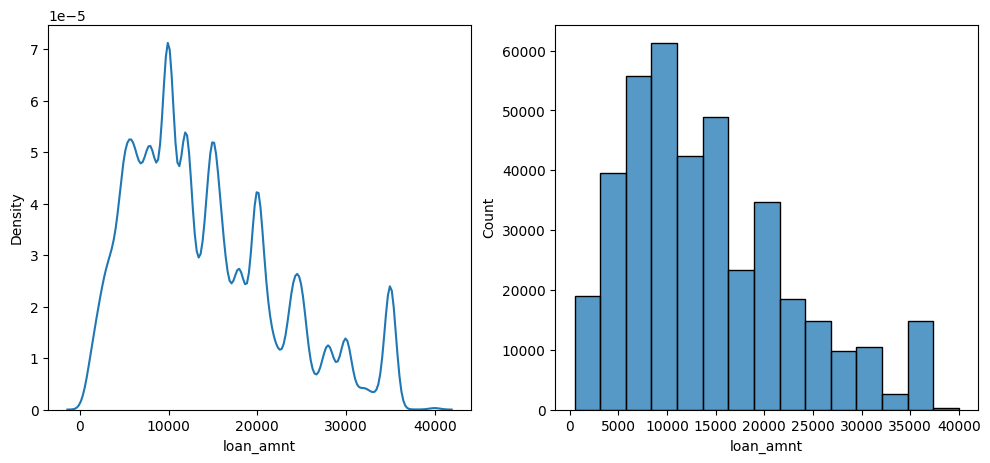

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='loan_amnt')
plt.subplot(1,2,2)
sns.histplot(data=df,x='loan_amnt',bins=15)
plt.show()

Dist is right skewed and also there are spikes in data

In [ ]:
df[(df['loan_amnt']>8000) & (df['loan_amnt']<20000)]['loan_amnt'].value_counts(ascending=False).head(10)

loan_amnt
10000.0    27668
12000.0    21366
15000.0    19903
16000.0    10129
18000.0     9195
14000.0     5963
9000.0      5491
13000.0     3377
9600.0      3328
11000.0     3200
Name: count, dtype: int64

Now we know that these spikes are due to the fact that people tend to apply for loan amt likes 10000,15000,20000 and small spikes are of 9000, 12000 ,16000, 18000

And also most people took loan amount of 10000 and it decreases as the loan amount increases.

**Interest Rate**

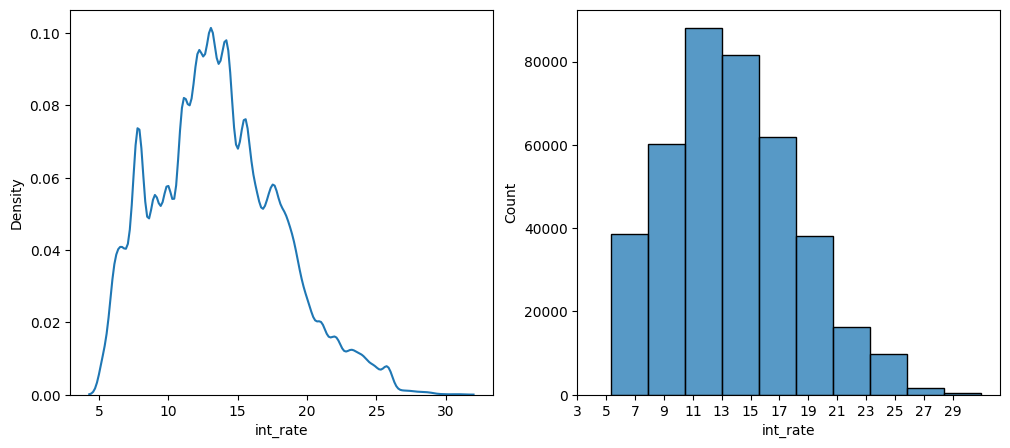

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='int_rate')
plt.subplot(1,2,2)
sns.histplot(data=df,x='int_rate',bins=10)
plt.xticks(np.arange(3,30,2))
plt.show()

In [ ]:
# Major spike evaluation
df[(df['int_rate']>=10) & (df['int_rate']<=16)]['int_rate'].value_counts().head(10)

int_rate
10.99    12411
12.99     9632
15.61     9350
11.99     8582
12.12     7358
13.11     6580
15.31     6110
13.99     5722
14.33     5670
11.14     5240
Name: count, dtype: int64

In [ ]:
# Mini spike evaluation
df[(df['int_rate']>=7) & (df['int_rate']<=10)]['int_rate'].value_counts().head(10)

int_rate
8.90    8019
7.90    7332
9.17    6108
9.99    5248
7.62    4839
7.89    4193
9.67    3145
8.18    3112
8.39    2939
7.69    2009
Name: count, dtype: int64

Insight:
1. Right Skewed Normal Dist
2. Most of the interest lies in between 11-16.
3. Most offered interest rate is 10.99.
4. Mini spike earlier is of 8.9 % interest rate

**Installment**

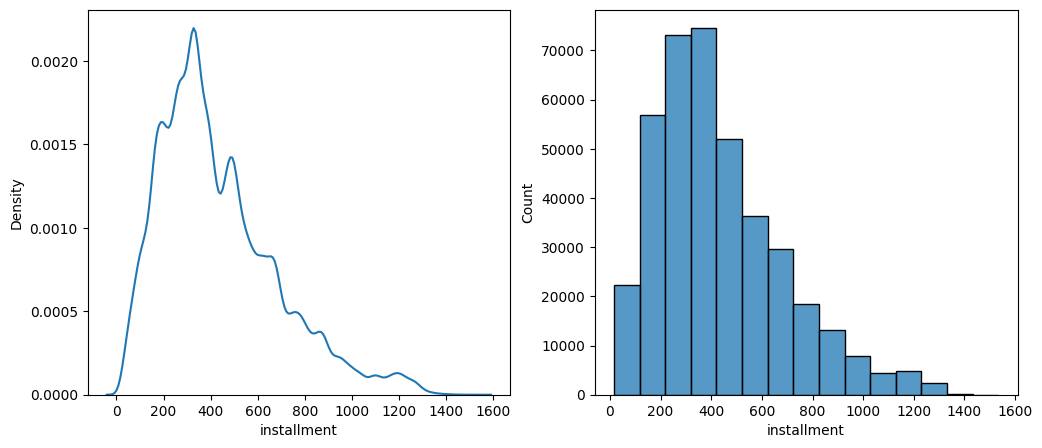

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='installment')
plt.subplot(1,2,2)
sns.histplot(data=df,x='installment',bins=15)
plt.show()

Insight:
1. Right Skewed Normal Dist
2. Most monthly installment lies in range 200-400 rs.

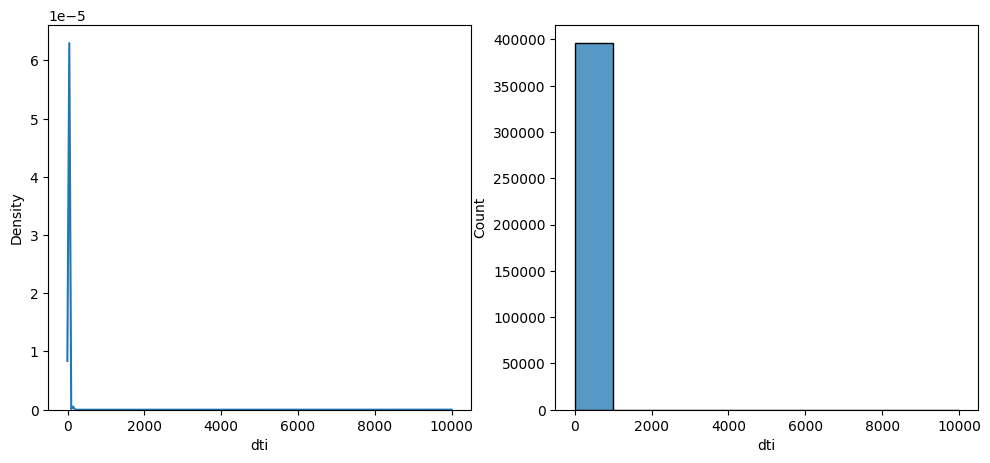

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='dti')
plt.subplot(1,2,2)
sns.histplot(data=df,x='dti',bins=10)
plt.show()

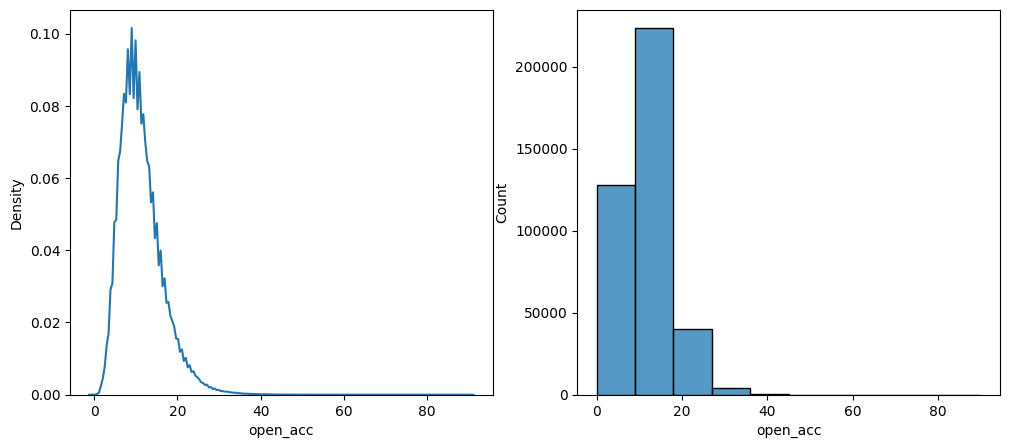

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='open_acc')
plt.subplot(1,2,2)
sns.histplot(data=df,x='open_acc',bins=10)
plt.show()

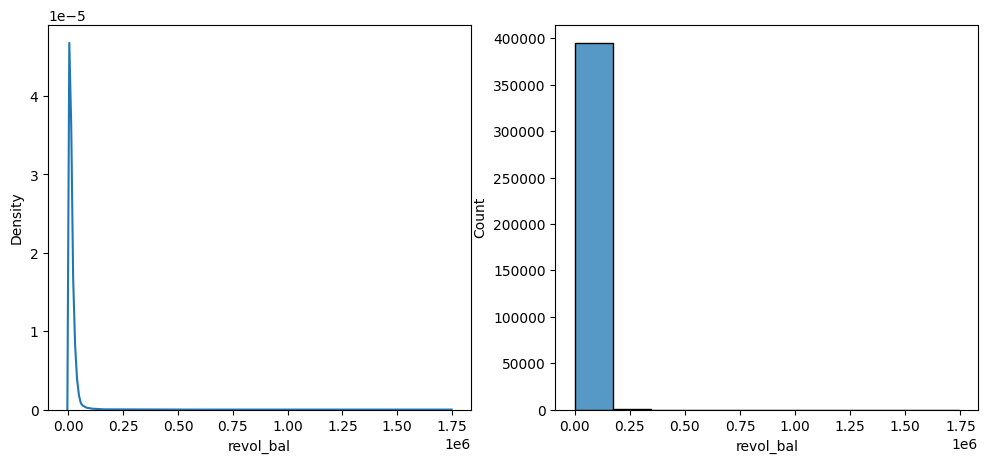

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='revol_bal')
plt.subplot(1,2,2)
sns.histplot(data=df,x='revol_bal',bins=10)
plt.show()

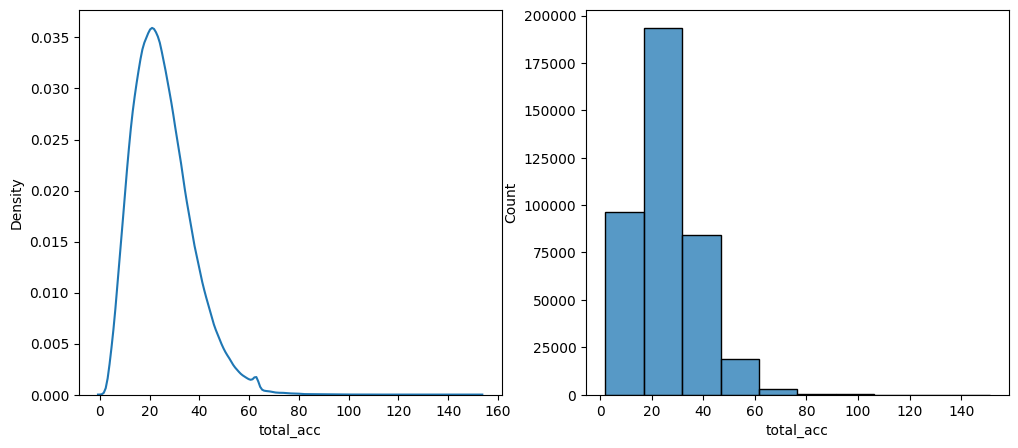

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='total_acc')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_acc',bins=10)
plt.show()

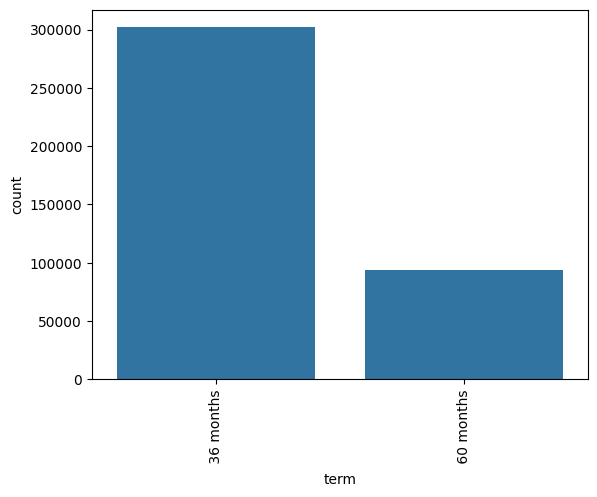

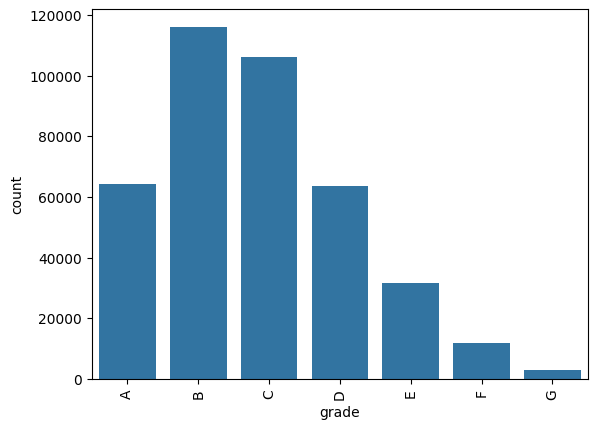

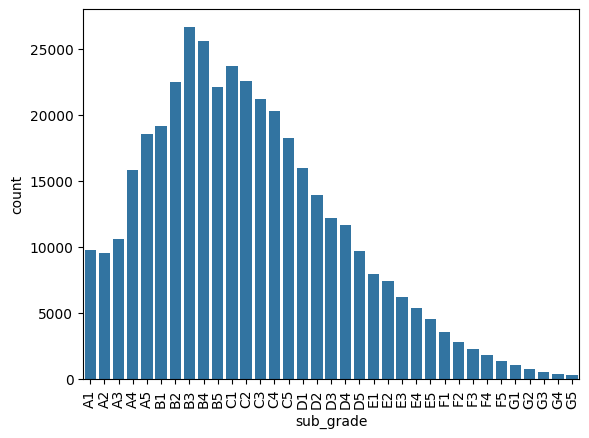

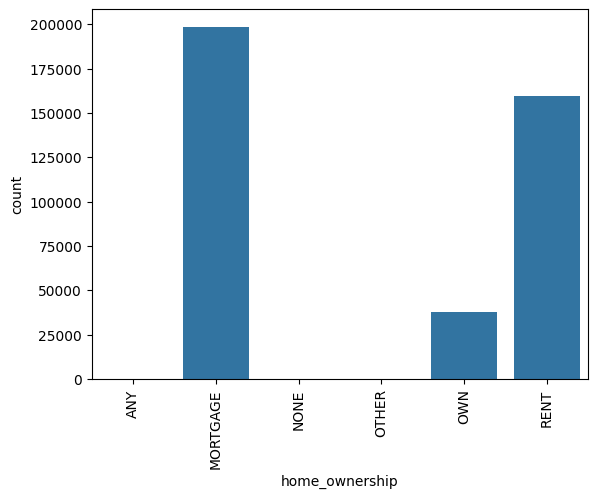

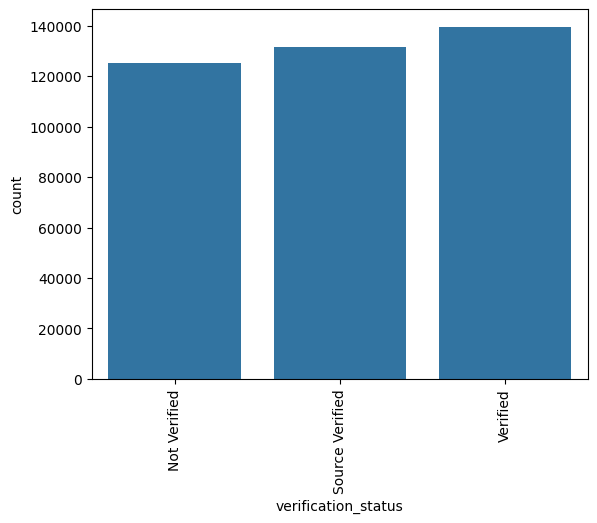

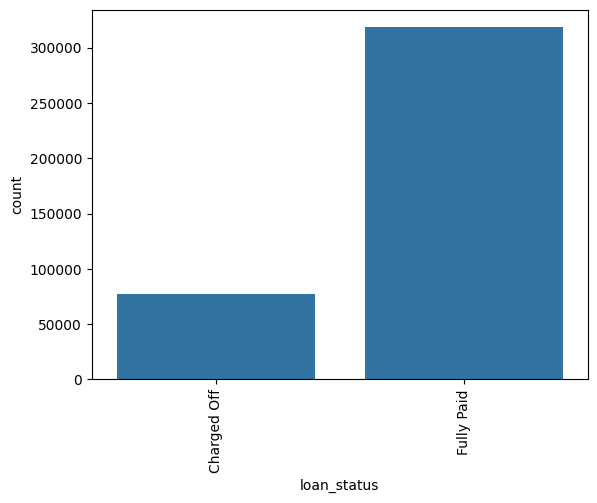

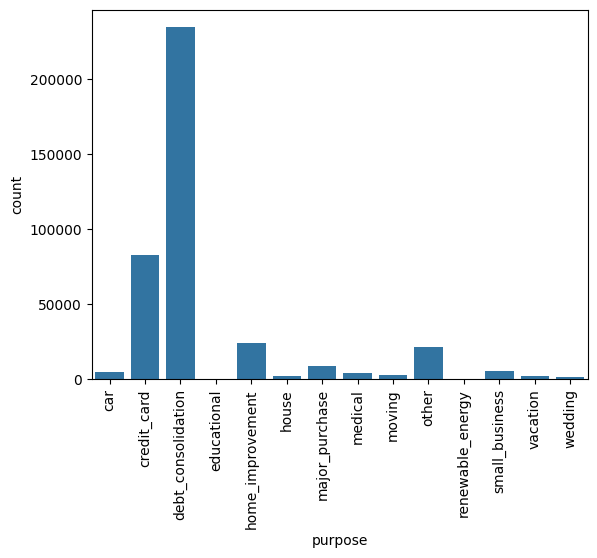

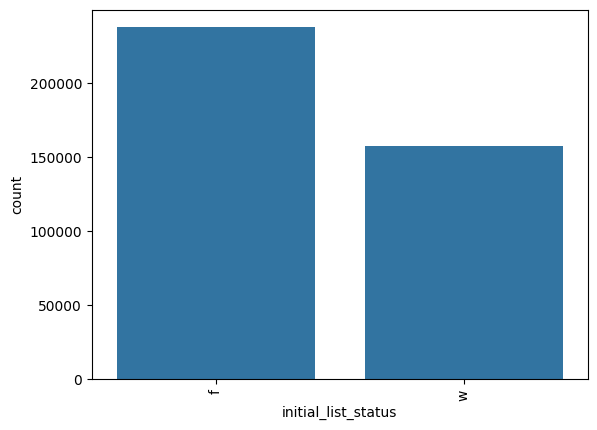

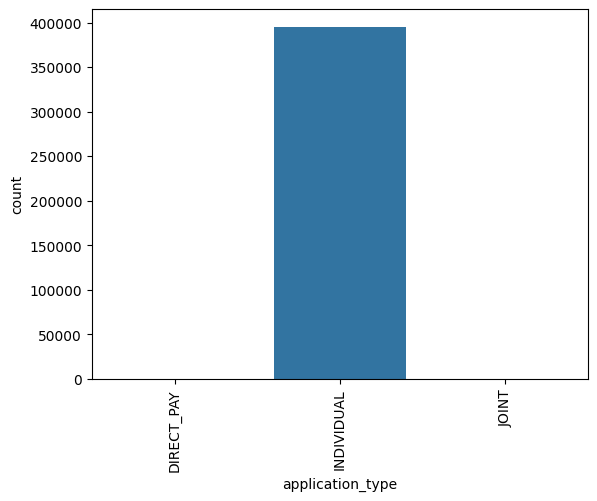

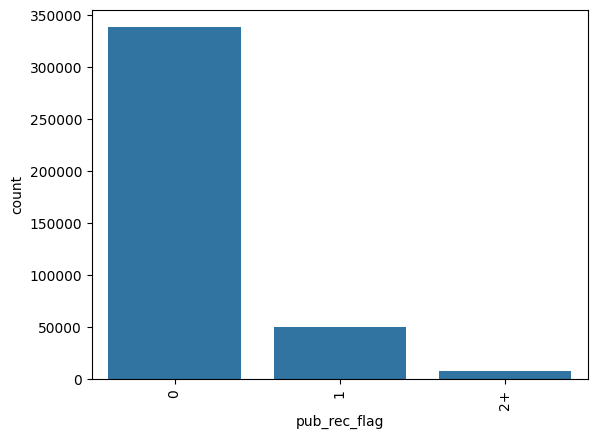

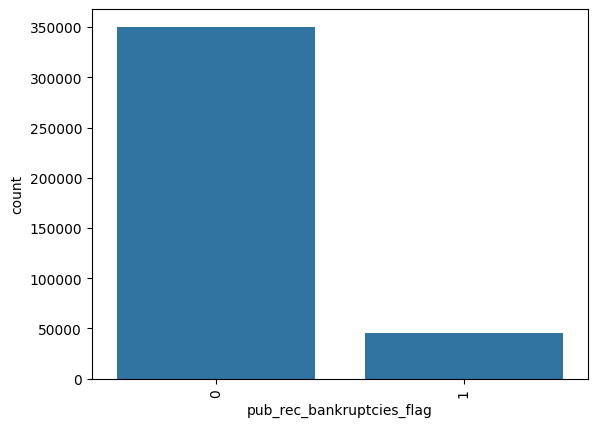

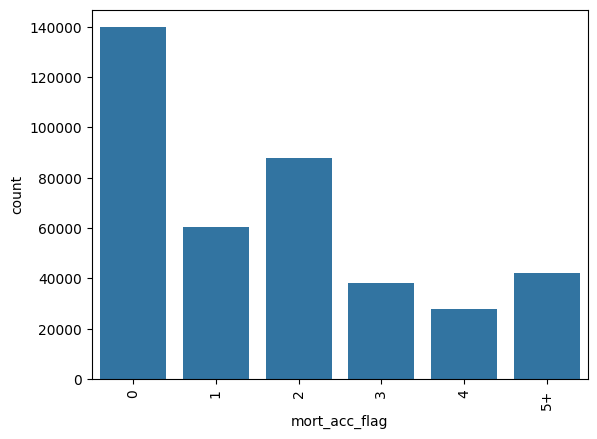

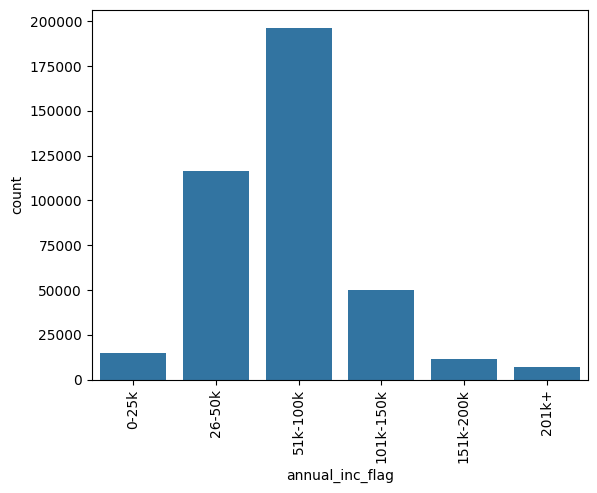

In [ ]:
for i in df.columns:
    if df[i].dtype=='category':
        sns.countplot(data=df,x=i)
        plt.xticks(rotation=90)
        plt.show()
# Huge no of people opted for 36 months that is 3 times as compared to 60 months term
# Most of the loans were of grade b and c and some of a and d and very few of e f g
# Mos to fpeople home ownership status is either mortage or rent with only 30000 people own the house
# Most people are more thatn 10+ year of experience
# Mos to fthe lloans are issued in 20115 14,13
# equal no of verification status,source verified,not verified,verified
# Most claimed purpose was debt consolidation and some credit card
# loan status most is full_paid and around 70000 charged_off
# initia list status are more in f and less in w
# almost  all applicants are individual
# most have no pub rec while around 50000 have 1 record and 2+ are 10000
# 40-50000 pub rec bacnkruptices accounts
# mort_Acc most have zero but few have 1 and 2
# most of the people have monthlyi income bewteen 50000 to 1 lakh per month while some wiTH 26000- 50k

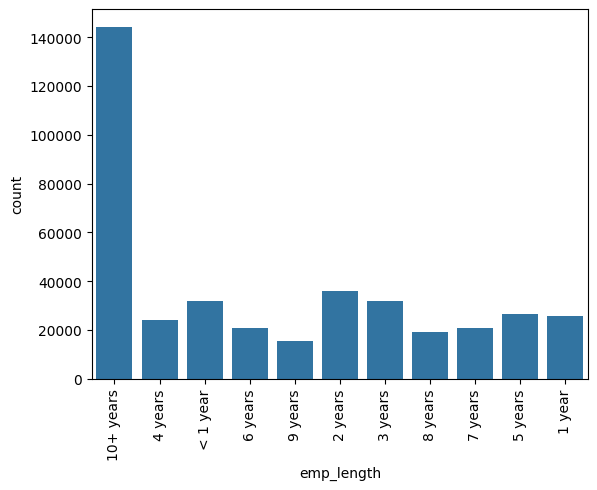

In [ ]:
sns.countplot(data=df,x='emp_length')
plt.xticks(rotation=90)
plt.show()

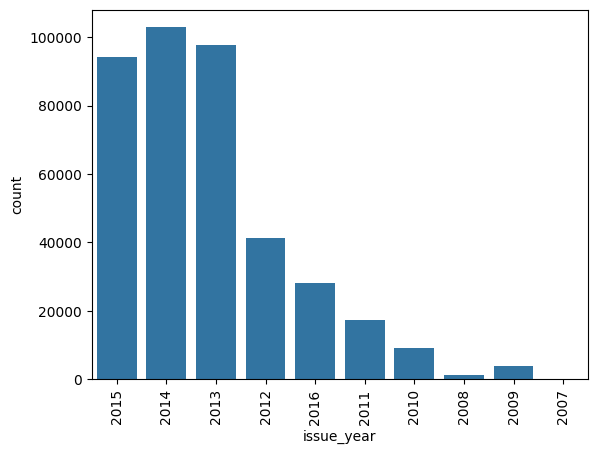

In [ ]:
sns.countplot(data=df,x='issue_year')
plt.xticks(rotation=90)
plt.show()

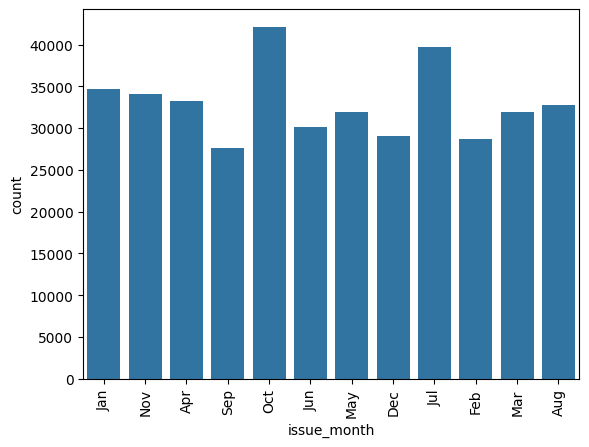

In [ ]:
sns.countplot(data=df,x='issue_month')
plt.xticks(rotation=90)
plt.show()

**Bivariate Analyis**

In [ ]:
sns.barplot(data=df,x=,hue='loan_status')

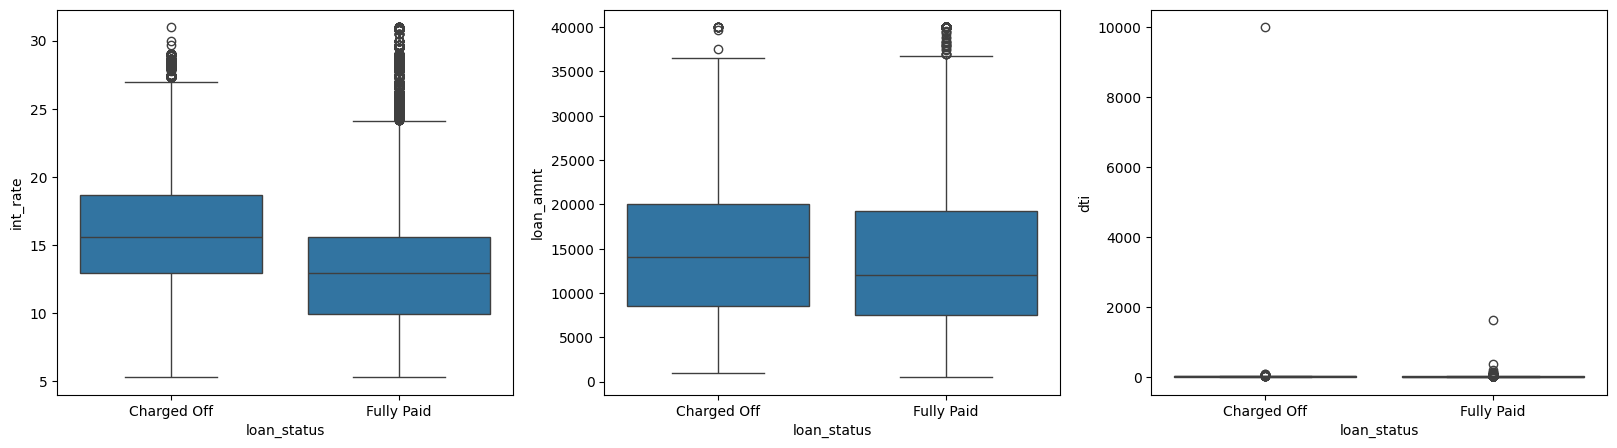

In [ ]:
# loan_amnt	int_rate	installment	annual_inc	dti	open_acc	pub_rec	revol_bal	revol_util	total_acc	mort_acc	pub_rec_bankruptcies
# sns.boxplot(data=df,x='loan_status',y='loan_amnt')
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='loan_status',y='int_rate')
plt.subplot(1,3,2)
sns.boxplot(data=df,x='loan_status',y='loan_amnt')
plt.subplot(1,3,3)
sns.boxplot(data=df,x='loan_status',y='dti')
plt.show()


In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.443671,11.886991,2.042867,0.355934
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.900000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


<Axes: xlabel='loan_amnt', ylabel='annual_inc'>

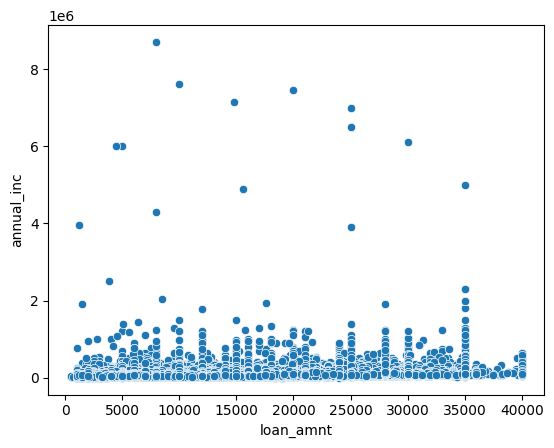

In [ ]:
# sns.scatterplot(data=df,x='installment',y='loan_amnt')
# sns.scatterplot(data=df,x='loan_amnt',y='annual_inc')
sns.scatterplot(data=df,)


Insight:
1. There is not much difference in loan anount of charged off and paid people

**Model buiding**

In [ ]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec_bankruptcies,address,city,state,issue_year,issue_month,pub_rec_flag,pub_rec_bankruptcies_flag,mort_acc_flag,annual_inc_flag
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",Mendozaberg,OK,2015,Jan,0,0,0,101k-150k
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",Loganmouth,SD,2015,Jan,0,0,3,51k-100k
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",New Sabrina,WV,2015,Jan,0,0,0,26-50k
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",Delacruzside,MA,2014,Nov,0,0,0,51k-100k
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",Greggshire,VA,2013,Apr,0,0,1,51k-100k
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...,North Deniseberg,DE,2015,Sep,0,0,4,51k-100k
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ...",East Stephanie,TX,2015,Sep,0,0,3,101k-150k
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,0.0,USCGC Nunez\r\nFPO AE 30723,FPO,AE,2012,Sep,0,0,0,26-50k
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,0.0,USCGC Tran\r\nFPO AP 22690,FPO,AP,2014,Oct,0,0,3,101k-150k
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813",Mauricestad,VA,2012,Apr,0,0,1,101k-150k


<Axes: >

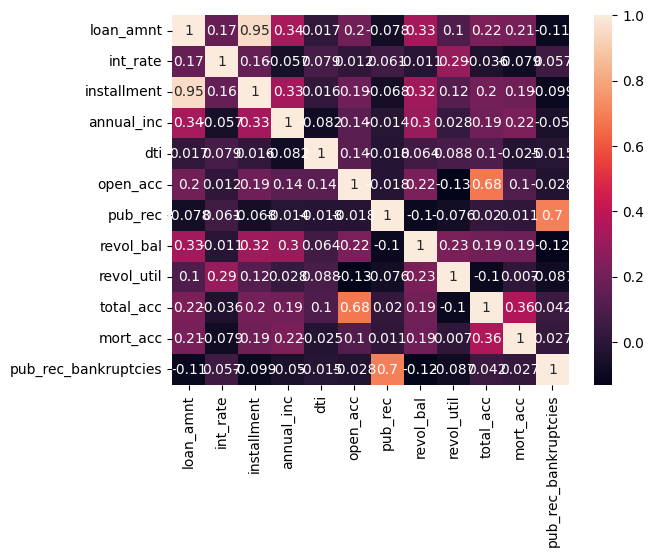

In [ ]:
corr =sns.heatmap(df.corr(numeric_only=True),annot=True)
corr